In [29]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import umap
from yellowbrick.cluster import SilhouetteVisualizer 
from sklearn.manifold import TSNE
import seaborn as sns

In [30]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_glcm_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_glcm_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))

In [31]:
df_glcm_z

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821,callo_1.png,smaller
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511,callo_10.png,smaller
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924,callo_100.png,smaller
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491,callo_101.png,smaller
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134,callo_95.png,higher
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234,callo_96.png,higher
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473,callo_97.png,higher
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952,callo_98.png,higher


In [32]:
df_glcm_z.isnull().sum()

contrast         0
dissimilarity    0
homogeneity      0
energy           0
correlation      0
ASM              0
filename         0
label            0
dtype: int64

In [33]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_z_cl= df_glcm_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

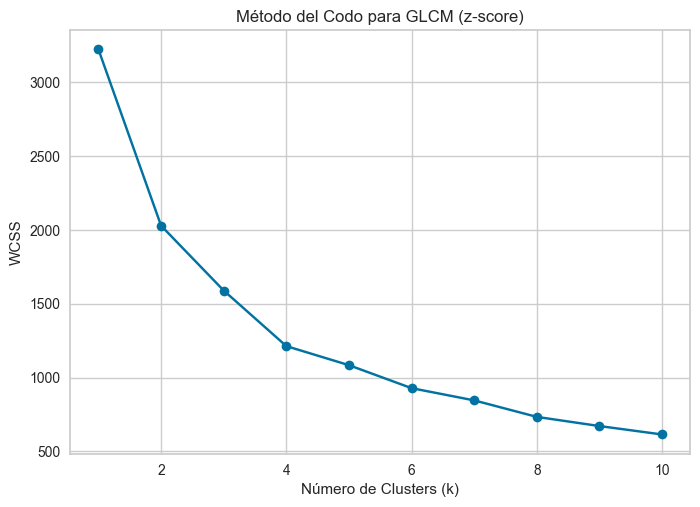

In [34]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

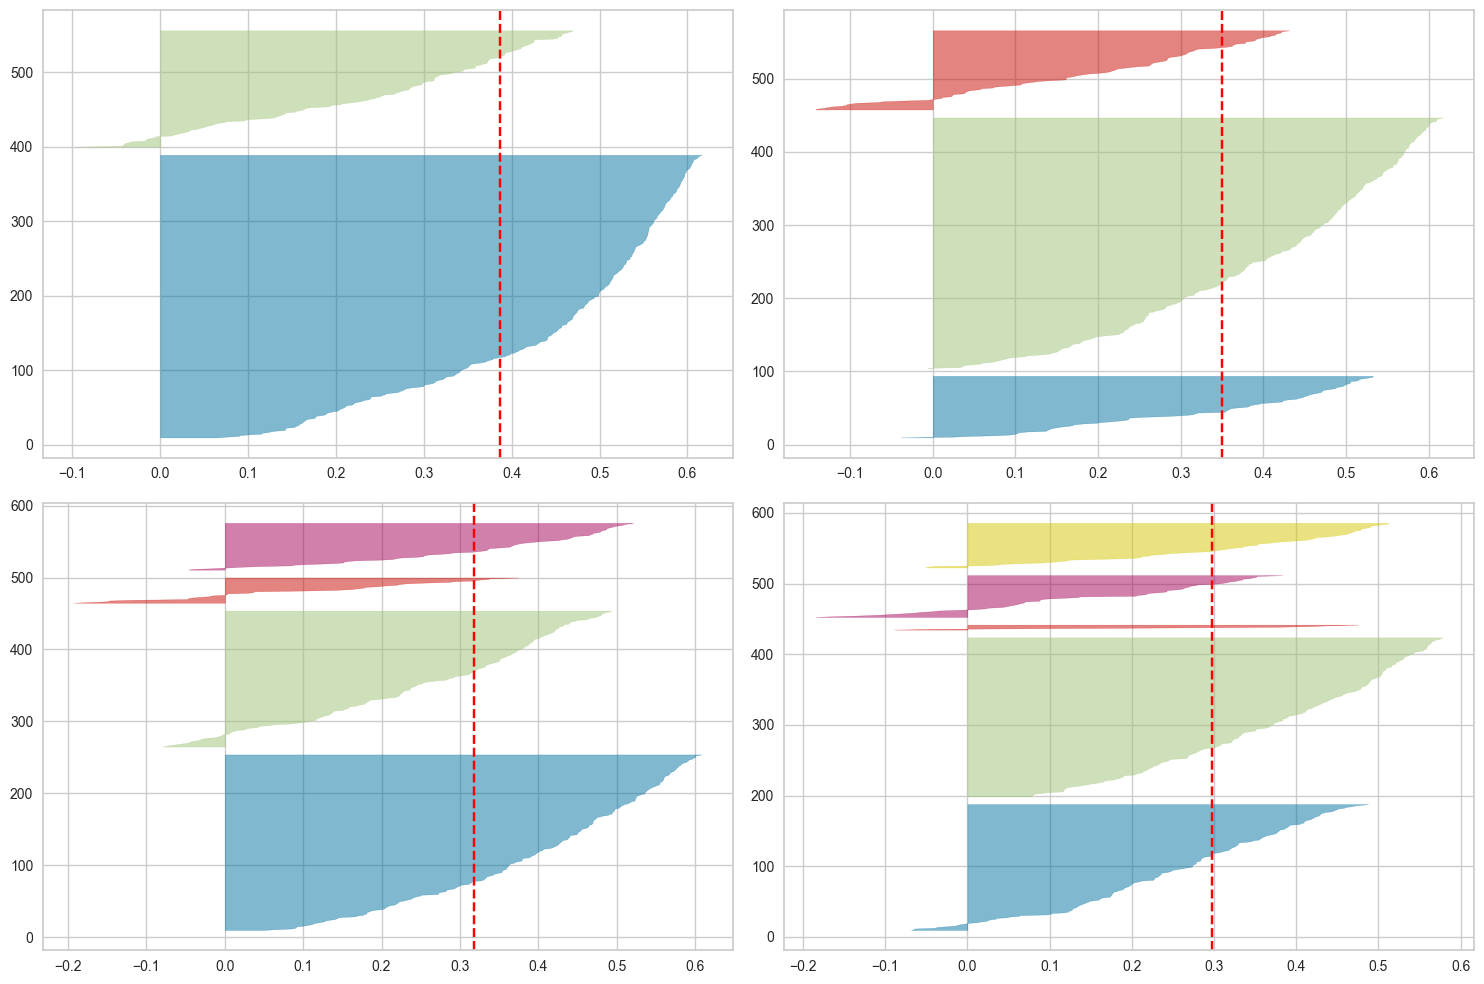

In [35]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [36]:
#Modelo k-means
cluster_glcm_z= KMeans(init='k-means++',n_clusters=2,random_state=42)
cluster_glcm_z.fit(df_glcm_z_cl)   

KMeans(n_clusters=2, random_state=42)

In [37]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_z['Cluster'] = cluster_glcm_z.labels_
pd.crosstab(df_glcm_z['Cluster'], df_glcm_z['label'])

label,higher,smaller
Cluster,,
0,246,134
1,22,135


-2 clusters: En el cluster 0 hay tanto imágenes higher como smaller, aunque más higher. Y en el cluster 1  está compuesto casi en su totalidad por imágenes smaller.
label	higher	smaller
Cluster		
0	246	134
1	22	135

-3 clusters: En el cluster 1 está compuesto por 100 imágenes high y 166 imágenes small. El lcuster 0 por 168 iágenes high (casi la totalidad del cluster) y el cluster 2 está formado por solo imágenes smaller (39)

In [38]:
silhouette_avg_glcm_z = silhouette_score(df_glcm_z_cl, cluster_glcm_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_z}')

Índice de silueta promedio: 0.3870992787571705


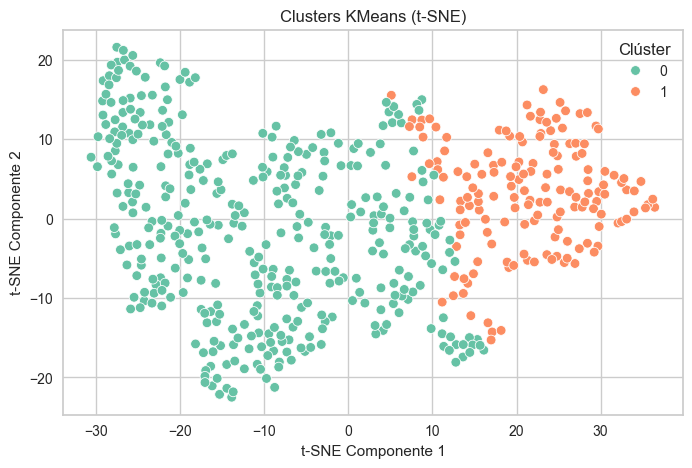

In [39]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_glcm_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_glcm_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


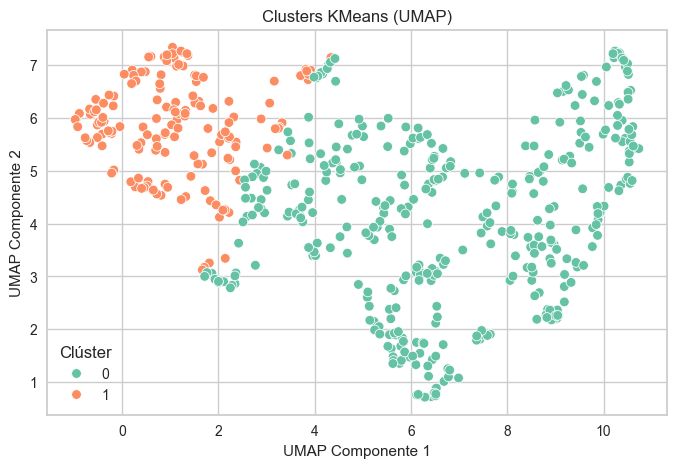

In [40]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_glcm_z_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_glcm_z['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [41]:
# Guardar resultados en DataFrame
df_resultado_z = pd.DataFrame({
    'filename': df_glcm_z['filename'],
    'label': df_glcm_z['label'],
    'cluster': df_glcm_z['Cluster']
})

# Guardar en archivo CSV 
#df_resultado_z.to_csv(os.path.join(folder_path, 'resultado_kmeans_textura_z.csv'), index=False)
df_resultado_z

,filename,label,cluster
0,callo_1.png,smaller,0
1,callo_10.png,smaller,0
2,callo_100.png,smaller,1
3,callo_101.png,smaller,1
4,callo_102.png,smaller,1
...,...,...,...
532,callo_95.png,higher,0
533,callo_96.png,higher,0
534,callo_97.png,higher,0
535,callo_98.png,higher,0


Ahora se realiza lo mismo pero con la normalización min-max

In [42]:
df_glcm_mm

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,filename,label
0,0.180035,0.153752,0.849470,0.637627,0.834112,0.524976,callo_1.png,smaller
1,0.108787,0.082758,0.916683,0.660920,0.789212,0.551927,callo_10.png,smaller
2,0.284960,0.269394,0.711725,0.413043,0.663472,0.294907,callo_100.png,smaller
3,0.210377,0.225344,0.713113,0.370628,0.698357,0.257087,callo_101.png,smaller
4,0.357567,0.380689,0.562984,0.380863,0.532437,0.265861,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.160144,0.123228,0.887216,0.526477,0.875368,0.404965,callo_95.png,higher
533,0.205163,0.123042,0.913790,0.434176,0.833322,0.314418,callo_96.png,higher
534,0.182547,0.152710,0.834166,0.457007,0.862728,0.336157,callo_97.png,higher
535,0.138639,0.065940,0.984693,0.787326,0.899824,0.705780,callo_98.png,higher


In [43]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_glcm_mm_cl= df_glcm_mm.drop(columns=['filename', 'label'])

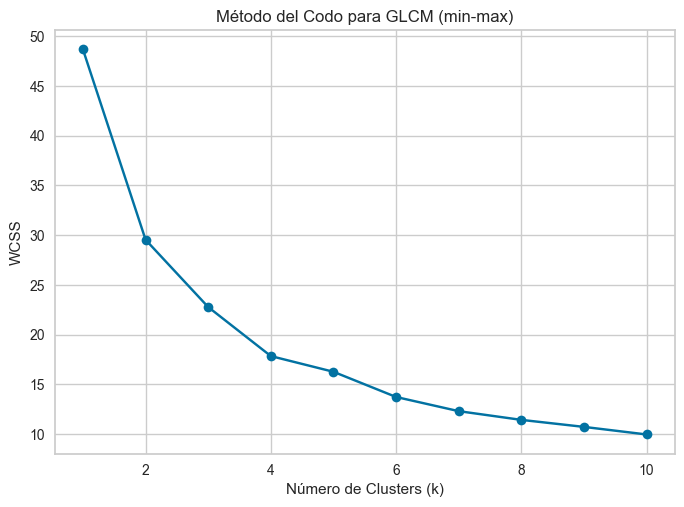

In [44]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_glcm_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

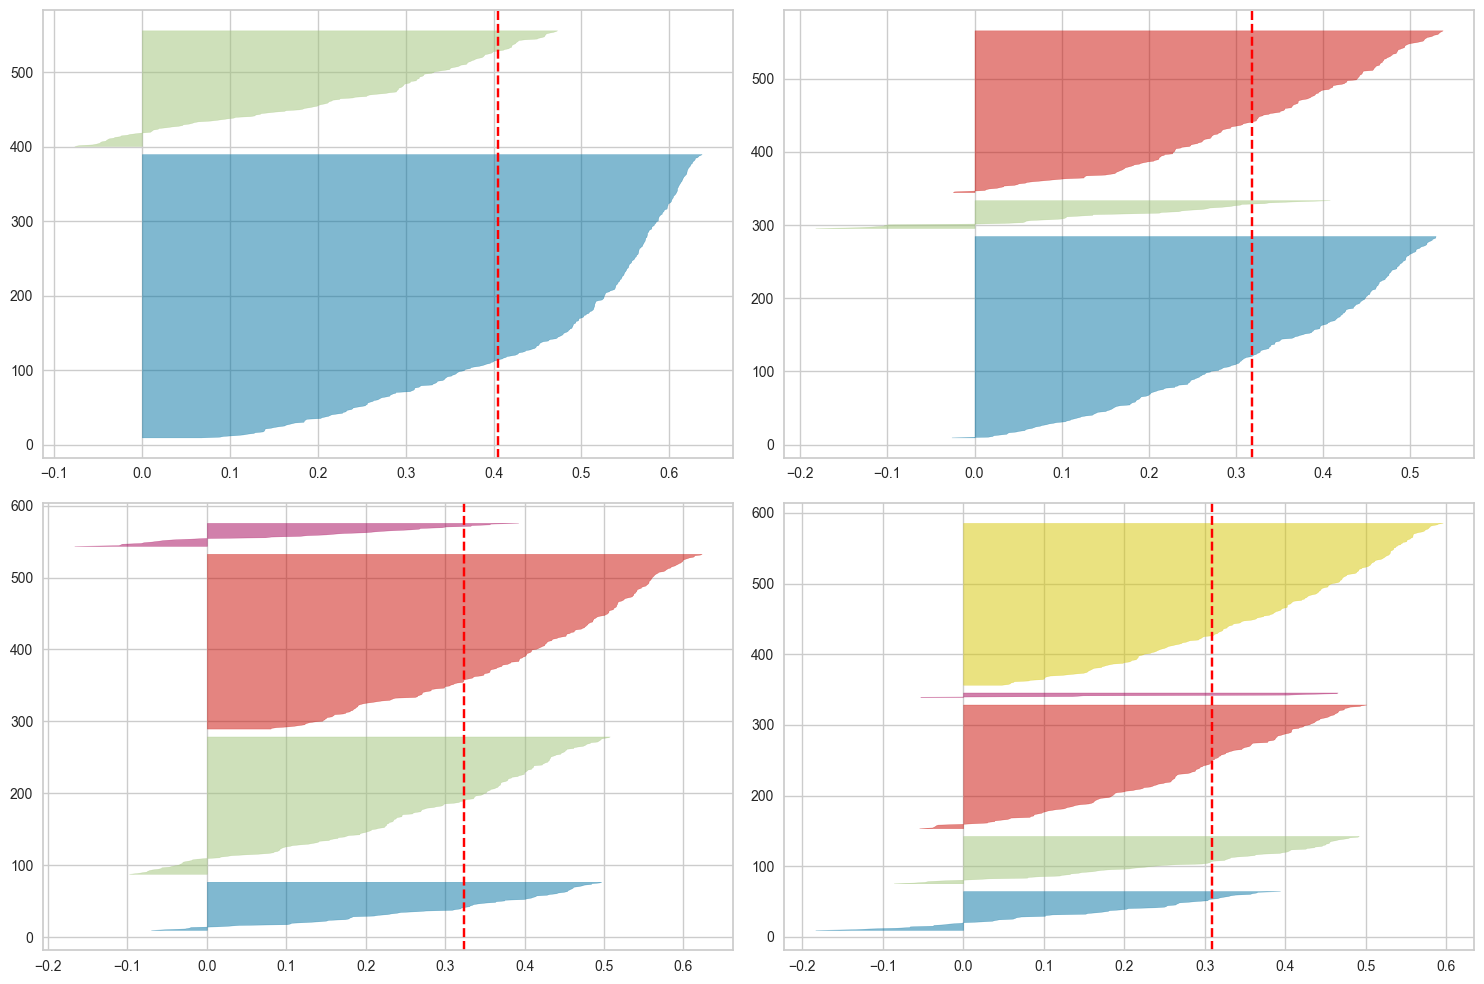

In [45]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_glcm_mm_cl)  

plt.tight_layout()
plt.show()

In [46]:
#Modelo k-means
cluster_glcm_mm= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_glcm_mm.fit(df_glcm_mm_cl) 

KMeans(n_clusters=3, random_state=42)

In [47]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_glcm_mm['Cluster'] = cluster_glcm_mm.labels_
pd.crosstab(df_glcm_mm['Cluster'], df_glcm_mm['label'])

label,higher,smaller
Cluster,,
0,201,75
1,0,39
2,67,155


-2 cluster: Pasa lo mismo que antes, en el cluster 0 si que están casi todas las imágenes higher, pero las imágenes smaller se reparten entre el cluster 1 y 0.
Cuando se establecen 3 clusters, las imágenes higher se concentran más en el cluster 0 y las smaller en el clustwe 2, quedando el cluster 1 con solo 39 imágene small.

In [48]:
silhouette_avg_glcm_mm = silhouette_score(df_glcm_mm_cl, cluster_glcm_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_glcm_mm}')

Índice de silueta promedio: 0.3184996942363979


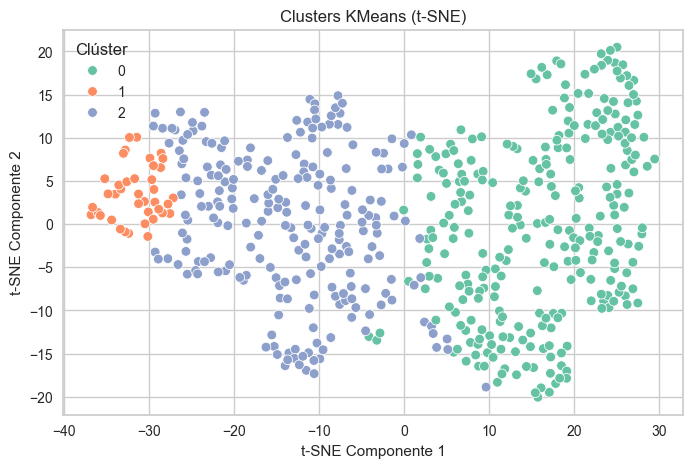

In [49]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_glcm_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_glcm_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (t-SNE)')
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


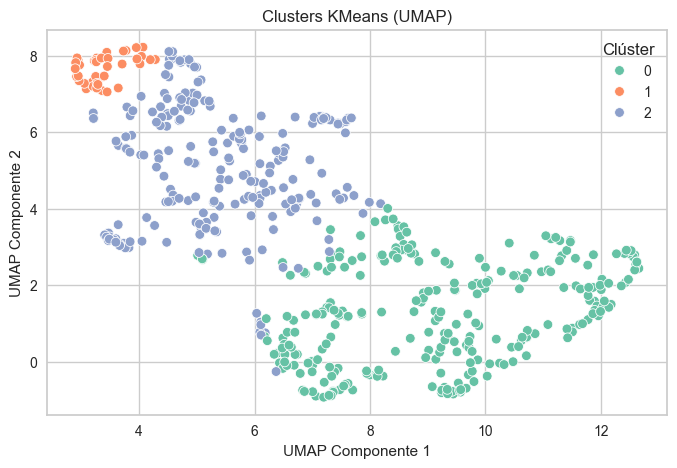

In [50]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df_glcm_mm_cl)

# Visualización
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=df_glcm_mm['Cluster'], palette='Set2')
plt.title('Clusters KMeans (UMAP)')
plt.xlabel('UMAP Componente 1')
plt.ylabel('UMAP Componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

reduccion de la dimensionalidd

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


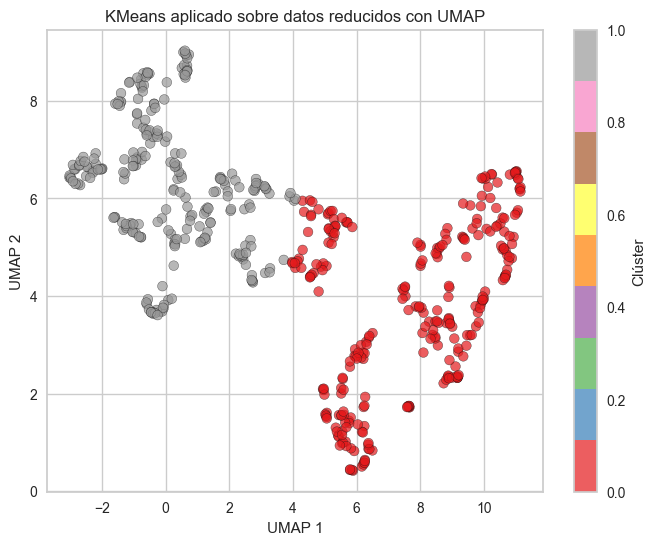

Índice de silueta (UMAP + KMeans): 0.595


,filename,label,cluster
0,callo_1.png,smaller,0
1,callo_10.png,smaller,0
2,callo_100.png,smaller,1
3,callo_101.png,smaller,1
4,callo_102.png,smaller,1
...,...,...,...
532,callo_95.png,higher,0
533,callo_96.png,higher,0
534,callo_97.png,higher,0
535,callo_98.png,higher,0


In [51]:
# 1. Reducción de dimensionalidad con UMAP
umap_model = umap.UMAP(n_neighbors=9, n_components=2, min_dist=0.01, random_state=42)
X_umap = umap_model.fit_transform(df_glcm_z_cl)

# 2. Aplicar KMeans sobre el espacio reducido
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_umap)

# 3. Añadir los clústeres al dataframe original
df_glcm_z['Cluster_UMAP'] = clusters

# 4. Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=clusters, cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre datos reducidos con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

# 5. Índice de silueta
silhouette = silhouette_score(X_umap, clusters)
print(f"Índice de silueta (UMAP + KMeans): {silhouette:.3f}")


# Guardar resultados en DataFrame
df_resultado_z_umap = pd.DataFrame({
    'filename': df_glcm_z['filename'],
    'label': df_glcm_z['label'],
    'cluster': df_glcm_z['Cluster_UMAP']
})

# Guardar en archivo CSV 
#df_resultado_z_umap.to_csv(os.path.join(folder_path, 'resultado_kmeans_textura_z_umap.csv'), index=False)

df_resultado_z_umap

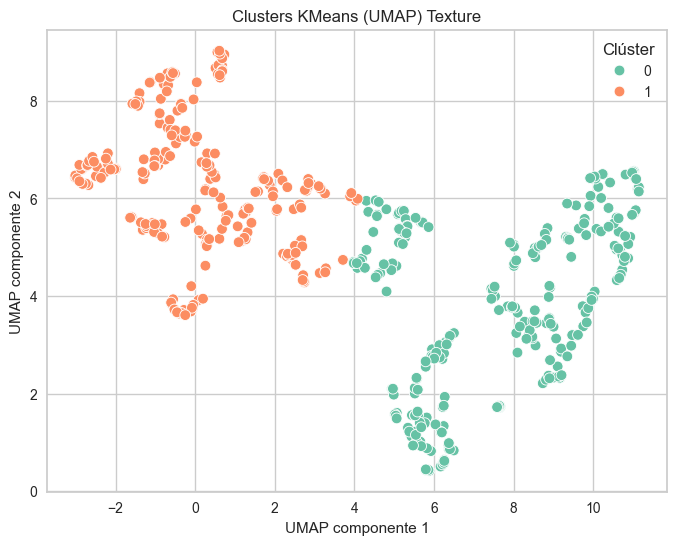

In [56]:
# Crear DataFrame para graficar
df_plot = pd.DataFrame({
    'UMAP 1': X_umap[:, 0],
    'UMAP 2': X_umap[:, 1],
    'Cluster': clusters.astype(str)
})

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title('Clusters KMeans (UMAP) Texture')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

In [ ]:
pd.crosstab(df_glcm_z['label'], df_glcm_z['Cluster_UMAP'])

Cluster_UMAP,0,1
label,,
higher,206,62
smaller,79,190


Cuando se aplica el clustering kmeans con el espacio reducido ya se puede ver más claramente que hay dos clusters aunque no perfectamente puros. 
En el cluster 0 estaría el 76.86% de las imágenes higher y en el cluster 1 el 70.63% de las imágenes smaller.

minmax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


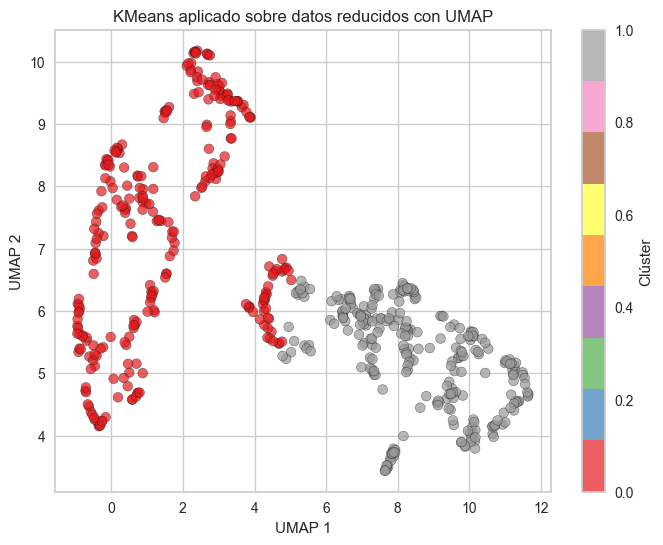

Índice de silueta (UMAP + KMeans): 0.594


In [ ]:
# 1. Reducción de dimensionalidad con UMAP
umap_model_mm = umap.UMAP(n_neighbors=10, n_components=3, min_dist=0.01, random_state=42)
X_umap_mm = umap_model_mm.fit_transform(df_glcm_mm_cl)

# 2. Aplicar KMeans sobre el espacio reducido
kmeans_mm = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters_mm = kmeans_mm.fit_predict(X_umap_mm)

# 3. Añadir los clústeres al dataframe original
df_glcm_mm['Cluster_UMAP'] = clusters_mm

# 4. Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(
    X_umap_mm[:, 0], X_umap_mm[:, 1],
    c=clusters_mm, cmap='Set1', edgecolor='k', alpha=0.7
)
plt.title('KMeans aplicado sobre datos reducidos con UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Clúster')
plt.grid(True)
plt.show()

# 5. Índice de silueta
silhouette_mm = silhouette_score(X_umap_mm, clusters_mm)
print(f"Índice de silueta (UMAP + KMeans): {silhouette_mm:.3f}")

In [ ]:
pd.crosstab(df_glcm_mm['label'], df_glcm_mm['Cluster_UMAP'])

Cluster_UMAP,0,1
label,,
higher,202,66
smaller,71,198


Se obtiene el mismo resultado que con la normalización zscore.
